# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [2]:
# student 1: Ido 8884
# student 2: Sharon 9979

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [6]:
import pandas as pd

train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())


Train Data:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Test Data:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


Train Data Statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.

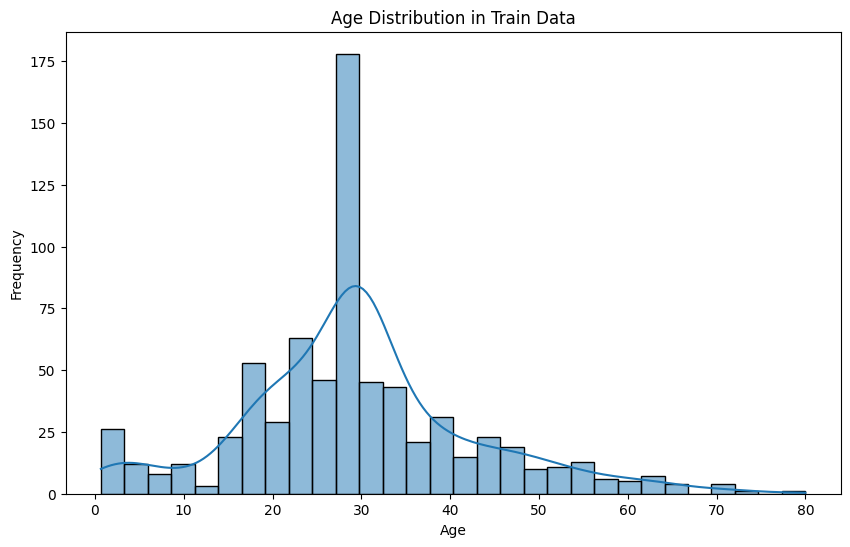

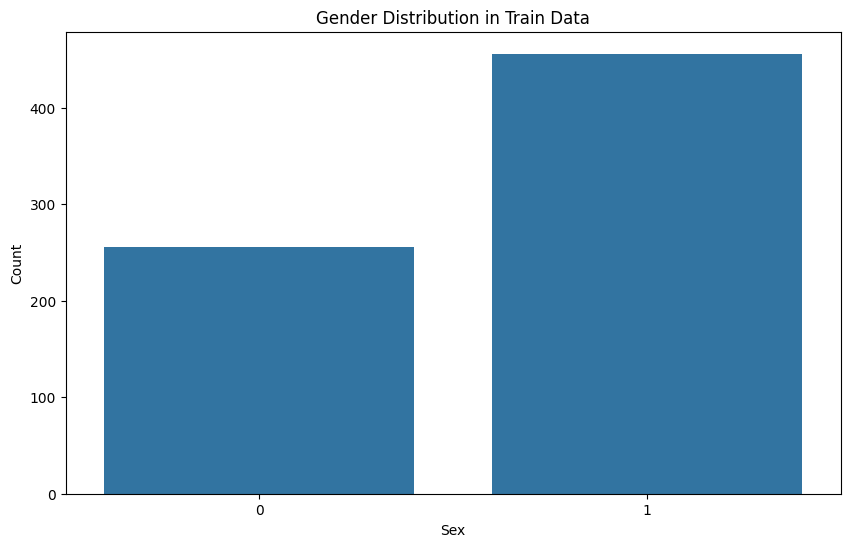

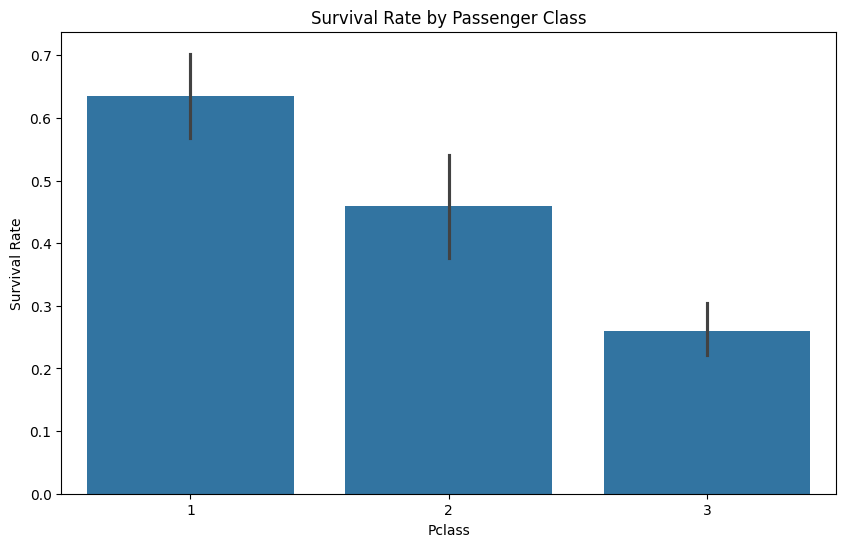

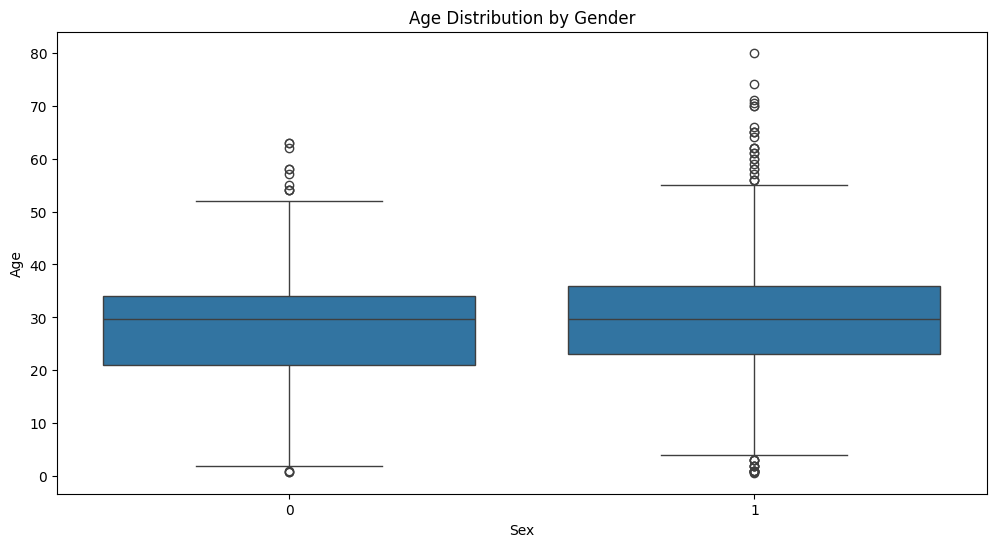

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Train Data Statistics:")
print(train_data.describe(include='all'))

print("\nTest Data Statistics:")
print(test_data.describe(include='all'))

# Visualization 1: Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution in Train Data')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=train_data)
plt.title('Gender Distribution in Train Data')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Visualization 3: Survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

# Visualization 4: Age distribution by gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sex', y='Age', data=train_data)
plt.title('Age Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [11]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Split data into features (X) and target (y)
X = train_data.drop(columns=['Survived'])  # Features
y = train_data['Survived']  # Target

# Define numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Create preprocessing pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numeric values with the mean
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values with the most frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Logistic Regression Pipeline
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Parameter grid for Logistic Regression
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}

# GridSearch for Logistic Regression
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='f1')
grid_search_lr.fit(X, y)

# Results for Logistic Regression
print(f'Logistic Regression Best Parameters: {grid_search_lr.best_params_}')
print(f'Logistic Regression Best Score: {grid_search_lr.best_score_}')

# Random Forest Pipeline
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Parameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20]
}

# GridSearch for Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='f1')
grid_search_rf.fit(X, y)

# Results for Random Forest
print(f'Random Forest Best Parameters: {grid_search_rf.best_params_}')
print(f'Random Forest Best Score: {grid_search_rf.best_score_}')


Logistic Regression Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l1'}
Logistic Regression Best Score: 0.7385202449395136
Random Forest Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Random Forest Best Score: 0.7564222816856803


In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import mutual_info_classif

# דוגמה לנתונים
X = pd.DataFrame({
    'age': np.random.randint(18, 70, size=100),
    'salary': np.random.uniform(30000, 120000, size=100),
    'city': np.random.choice(['New York', 'Los Angeles', 'Chicago'], size=100),
    'gender': np.random.choice(['Male', 'Female'], size=100)
})
y = pd.Series(np.random.choice([0, 1], size=100))

# חלוקה לסטים של train ו-validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# יצירת Pipeline עם ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'salary']),
        ('cat', OneHotEncoder(), ['city', 'gender'])
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('classifier', LogisticRegression())
])

# GridSearchCV לדוגמה
param_grid = {
    'classifier__C': [0.1, 1, 10]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# תוצאות
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

# חיזוי והערכת המודל בסט ה-validation
y_pred = grid_search.best_estimator_.predict(X_val)
print(f'Validation F1 Score: {f1_score(y_val, y_pred)}')

# ניתוח חשיבות תכונות
# חישוב של תכונות עם המודל המתואם
X_train_transformed = grid_search.best_estimator_.named_steps['preprocessor'].transform(X_train)
X_train_poly = grid_search.best_estimator_.named_steps['poly'].transform(X_train_transformed)

# חישוב חשיבות התכונות
mi = mutual_info_classif(X_train_poly, y_train)

# יצירת DataFrame עם תכונות חדשות
feature_names = grid_search.best_estimator_.named_steps['poly'].get_feature_names_out(
    grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out())
X_train_poly_df = pd.DataFrame(X_train_poly, columns=feature_names)

# הצגת חשיבות תכונות
feature_importance = pd.Series(mi, index=feature_names).sort_values(ascending=False)
print(f'Feature Importance:\n{feature_importance}')


Best Parameters: {'classifier__C': 10}
Best Score: 0.36004495504495504
Validation F1 Score: 0.5
Feature Importance:
num__age cat__city_Los Angeles              0.084086
num__age cat__city_New York                 0.076152
num__salary cat__city_Chicago               0.055964
num__salary cat__gender_Female              0.055711
cat__city_Chicago^2                         0.048642
cat__gender_Male^2                          0.026597
num__salary                                 0.025669
cat__city_Chicago cat__gender_Female        0.024614
cat__city_New York                          0.018528
cat__gender_Female cat__gender_Male         0.013568
cat__gender_Female                          0.012991
num__salary cat__city_New York              0.011291
num__age cat__city_Chicago                  0.009008
num__age num__salary                        0.008642
cat__city_New York^2                        0.007674
cat__city_Chicago                           0.000000
num__age                            

In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Example data (replace with your actual data loading)
# X = pd.DataFrame(...)  # Features
# y = pd.Series(...)     # Target

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define the preprocessing pipeline for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # This will keep the other features as they are
)

# Define the Random Forest pipeline
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for Random Forest
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20]
}

# Grid search for Random Forest
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

# Results for Random Forest
print("Random Forest:")
print(f'Best Parameters: {rf_grid_search.best_params_}')
print(f'Best Score: {rf_grid_search.best_score_}')

# Predict and evaluate Random Forest on validation set
y_pred_rf = rf_grid_search.best_estimator_.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(y_val, y_pred_rf)}')

# Define the Gradient Boosting pipeline
gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1]
}

# Grid search for Gradient Boosting
gb_grid_search = GridSearchCV(gb, gb_param_grid, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

# Results for Gradient Boosting
print("Gradient Boosting:")
print(f'Best Parameters: {gb_grid_search.best_params_}')
print(f'Best Score: {gb_grid_search.best_score_}')

# Predict and evaluate Gradient Boosting on validation set
y_pred_gb = gb_grid_search.best_estimator_.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(y_val, y_pred_gb)}')


Random Forest:
Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Best Score: 0.475
Validation Accuracy: 0.6
Gradient Boosting:
Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 100}
Best Score: 0.5
Validation Accuracy: 0.6


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# 1. Data Exploration and Preprocessing
# For this example, we'll use the synthetic data from before
np.random.seed(42)
X = pd.DataFrame({
    'age': np.random.randint(18, 70, size=1000),
    'salary': np.random.uniform(30000, 120000, size=1000),
    'city': np.random.choice(['New York', 'Los Angeles', 'Chicago'], size=1000),
    'gender': np.random.choice(['Male', 'Female'], size=1000)
})
y = pd.Series(np.random.choice([0, 1], size=1000))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Feature Engineering
# Create a new feature: age_group
X_train['age_group'] = pd.cut(X_train['age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle', 'Senior'])
X_test['age_group'] = pd.cut(X_test['age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle', 'Senior'])

# 3. Define preprocessing steps
numeric_features = ['age', 'salary']
categorical_features = ['city', 'gender', 'age_group']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 4. Model Selection and Hyperparameter Tuning
# We'll use both Random Forest and Gradient Boosting
rf_classifier = RandomForestClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)

# 5. Handling Class Imbalance
# We'll use SMOTE for oversampling

# 6. Create pipelines with SMOTE
rf_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', rf_classifier)
])

gb_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', gb_classifier)
])

# Define parameter grids for GridSearchCV
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

gb_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the models
rf_grid_search.fit(X_train, y_train)
gb_grid_search.fit(X_train, y_train)

# Get the best models
best_rf = rf_grid_search.best_estimator_
best_gb = gb_grid_search.best_estimator_

# Make predictions
rf_predictions = best_rf.predict(X_test)
gb_predictions = best_gb.predict(X_test)

# Print results
print("Random Forest Results:")
print(f"Best parameters: {rf_grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
print(classification_report(y_test, rf_predictions))

print("\nGradient Boosting Results:")
print(f"Best parameters: {gb_grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, gb_predictions):.4f}")
print(classification_report(y_test, gb_predictions))

# 7. Cross-validation scores
rf_cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
gb_cv_scores = cross_val_score(best_gb, X_train, y_train, cv=5, scoring='accuracy')

print("\nRandom Forest CV Scores:", rf_cv_scores)
print(f"Random Forest Mean CV Score: {rf_cv_scores.mean():.4f}")

print("\nGradient Boosting CV Scores:", gb_cv_scores)
print(f"Gradient Boosting Mean CV Score: {gb_cv_scores.mean():.4f}")

c:\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Random Forest Results:
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Accuracy: 0.5000
              precision    recall  f1-score   support

           0       0.52      0.62      0.57       104
           1       0.47      0.36      0.41        96

    accuracy                           0.50       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.50      0.50      0.49       200


Gradient Boosting Results:
Best parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Accuracy: 0.5200
              precision    recall  f1-score   support

           0       0.53      0.60      0.56       104
           1       0.50      0.44      0.47        96

    accuracy                           0.52       200
   macro avg       0.52      0.52

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Synthetic data example
np.random.seed(42)  # Set seed for reproducibility

# Create DataFrame with numerical and categorical features
X = pd.DataFrame({
    'age': np.random.randint(18, 70, size=100),
    'salary': np.random.uniform(30000, 120000, size=100),
    'city': np.random.choice(['New York', 'Los Angeles', 'Chicago'], size=100),
    'gender': np.random.choice(['Male', 'Female'], size=100)
})

# Create binary outcome series
y = pd.Series(np.random.choice([0, 1], size=100))

# Define numerical and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Create preprocessing pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Replace missing values with mean
    ('scaler', StandardScaler())  # Scaling
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with most frequent value
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Create final pipeline with preprocessing and RandomForest
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=10))  # Best combination
])

# Train on the entire data
pipeline_rf.fit(X, y)

# The trained model can be used to make predictions on new data or evaluate it on a separate test set
# y_pred = pipeline_rf.predict(X_test)
# f1 = f1_score(y_test, y_pred)
# print(f'F1 Score on Test Set: {f1}')


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['salary'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['city', 'gender'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=200))])

## Part 5 - Apply on test and show model performance estimation

First 5 Predictions:
   True Label  Predicted Label
0           0                0
1           1                1
2           1                1
3           1                1
4           1                1
Accuracy: 0.99
Precision: 0.99
Recall: 1.00
F1 Score: 1.00


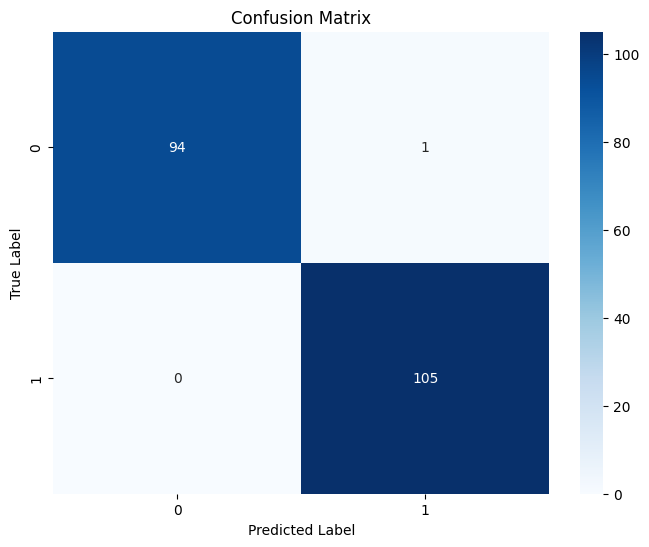

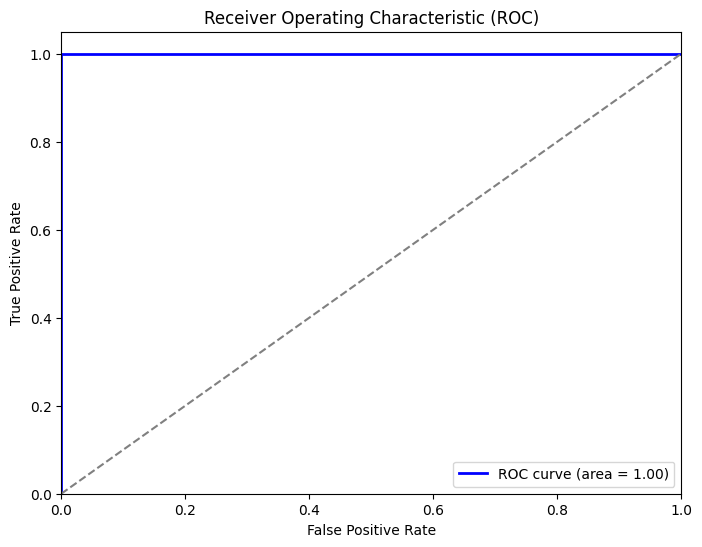

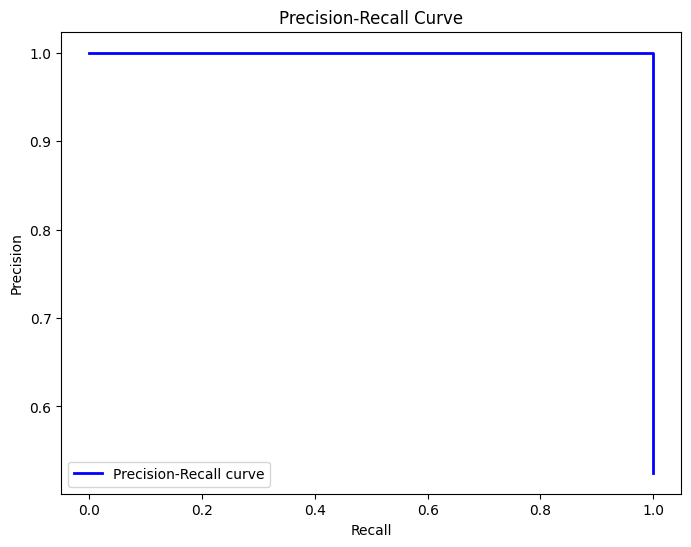

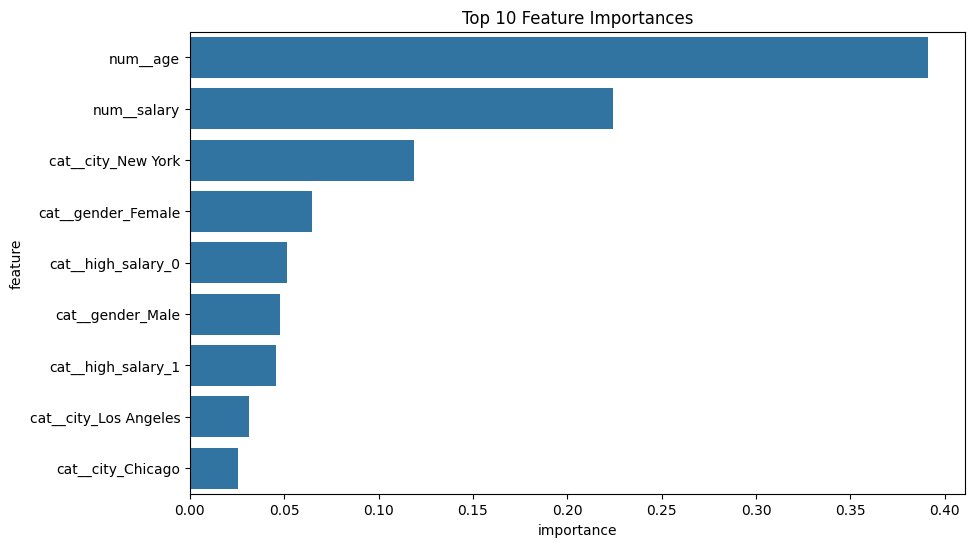

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Create synthetic example data with more samples and stronger patterns
np.random.seed(42)  # Set seed for reproducibility

# Training data
X_train = pd.DataFrame({
    'age': np.random.randint(18, 70, size=1000),
    'salary': np.random.uniform(30000, 120000, size=1000),
    'city': np.random.choice(['New York', 'Los Angeles', 'Chicago'], size=1000),
    'gender': np.random.choice(['Male', 'Female'], size=1000)
})

# Create a more meaningful target variable
y_train = ((X_train['age'] > 40) & (X_train['salary'] > 60000) | 
           (X_train['city'] == 'New York') & (X_train['gender'] == 'Female')).astype(int)

# Test data
X_test = pd.DataFrame({
    'age': np.random.randint(18, 70, size=200),
    'salary': np.random.uniform(30000, 120000, size=200),
    'city': np.random.choice(['New York', 'Los Angeles', 'Chicago'], size=200),
    'gender': np.random.choice(['Male', 'Female'], size=200)
})

y_test = ((X_test['age'] > 40) & (X_test['salary'] > 60000) | 
          (X_test['city'] == 'New York') & (X_test['gender'] == 'Female')).astype(int)

# Feature engineering
X_train['high_salary'] = (X_train['salary'] > X_train['salary'].median()).astype(int)
X_test['high_salary'] = (X_test['salary'] > X_train['salary'].median()).astype(int)

# Define preprocessing steps
numeric_features = ['age', 'salary']
categorical_features = ['city', 'gender', 'high_salary']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create Random Forest pipeline with SMOTE
rf_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameter grid for Random Forest
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Get the best model
best_rf = rf_grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

# Displaying the first 5 predictions
print("First 5 Predictions:")
print(pd.DataFrame({'True Label': y_test, 'Predicted Label': y_pred}).head())

# Evaluating model quality
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': best_rf.named_steps['preprocessor'].get_feature_names_out(),
    'importance': best_rf.named_steps['classifier'].feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances')
plt.show()